In [82]:
import pandas as pd 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [83]:
#Reading Input Data
file_path = r"C:/Users/Mangar William/Desktop/Implementing Logistic Recursition.csv"
data = pd.read_csv(file_path)

In [84]:
data

,Customer_Age,Customer_Load_Amount,Load_status
0,31,1000,1
1,29,1200,1
2,56,800,1
3,45,1300,1
4,34,5800,0
5,67,700,0
6,54,900,0
7,39,2300,0
8,64,5800,0
9,30,6500,0


## Data Cleaning and outlier treatment code goes her.....................

## Data Preparation steps

In [85]:
# loading machine learning (library from sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [86]:
# Separating train and test data 
independent_variables = ['Customer_Age' , 'Customer_Load_Amount']
x = data[independent_variables]   # independent variables
y = data['Load_status'] # dependent variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)
print('train:', len(x_train), 'test:', len(x_test))

train: 12 test: 8


## Training the classification Model

In [87]:
# instantiate a Logistic regression model, and fit with x and y
model = LogisticRegression(solver="lbfgs")
model = model.fit(x_train, y_train)

#check the occurancy on the training set
model.score(x_train, y_train)

0.75

## Evaluating the model

In [88]:
# predict will give the predicted results for test set
print(model.predict(x_test))

[0 0 0 0 0 0 1 1]


In [89]:
# generate evaluation metrics
from sklearn import metrics
print("Accuracy ON TEST SET:", metrics.accuracy_score(y_test, model.predict(x_test)))

Accuracy ON TEST SET: 0.625


In [90]:
print("confusion matrix:", metrics.confusion_matrix(y_test, model.predict(x_test)))

confusion matrix: [[4 1]
 [2 1]]


ROC AUC: 0.53


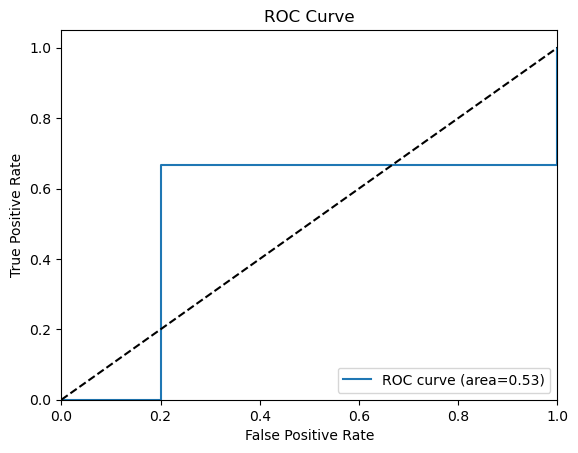

In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt

# ROC CURVE
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area=%0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')  # reference line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
